# Music Generation Using Wavenet and LSTM 

## Common Code For Reading the MIDI Files

In [1]:
#library for understanding music
from music21 import *


# Music21 Documentation: https://web.mit.edu/music21/doc/

In [2]:
# Defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    # Parsing single midi file
    midi = converter.parse(file)
  
    # Grouping based on different instruments. In this case, we are using monophonic music (Piano). 
    # Hence, it won't make much difference in terms of variation of music instruments.
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano. Slect only piano (in case any other instrument is used in the audio file)
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                # Extracting Notes and appending in the list notes
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                # Extracting chords and appending in the list notes
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

### Genre: Classical

<img src="Classical.jpg" style="width: 1000px;height: 300px"/>

In [3]:
#for listing down the file names
import os

# Importing Numpy library
import numpy as np

# Specifying the path to read the midi files
path= "C:\\Users\\Deepak\\OneDrive - National College of Ireland\\NCI\\Sem 2\\DMML 2\\Dataset\\Classical"

# Read all the midi files from the above specified path
files=[i for i in os.listdir(path) if i.endswith(".mid")]

# Reading each midi files (using the 'read_midi' function defined above) from the specified path.
notes_array = np.array([read_midi(path+'\\'+i) for i in files])

Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\A La Folie.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Ah How sunny.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Antonin Dvorak  Humoresque.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Arabesque in a Minor.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Aus Holbergs Zeit_ op 40 Air - Andante Religioso.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Big My Secret.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Bryllupsdag På Troldhaugen_ Op 65 No 6.mid
Loading Music File: C:\Users

Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Nel seggio placido.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Nimrod.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Nutcracker Suite Op71A Dance Of The Sugar Plum Fairy.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Nutcracker Suite Op71A Russian Dance.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Off to the Aquarium.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\One Hand, One Heart.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Classical\Patricia Rag.mid
Loading Music File: C:\Users\Deep

C:\Users\Deepak\Anaconda3\envs\deepmusic_tf\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [4]:
notes_array.shape

(90,)

In [5]:
type(notes_array)

numpy.ndarray

In [6]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

364


(array([272.,  30.,  24.,  10.,  10.,   5.,   2.,   7.,   1.,   3.]),
 array([  1. ,  92.4, 183.8, 275.2, 366.6, 458. , 549.4, 640.8, 732.2,
        823.6, 915. ]),
 <BarContainer object of 10 artists>)

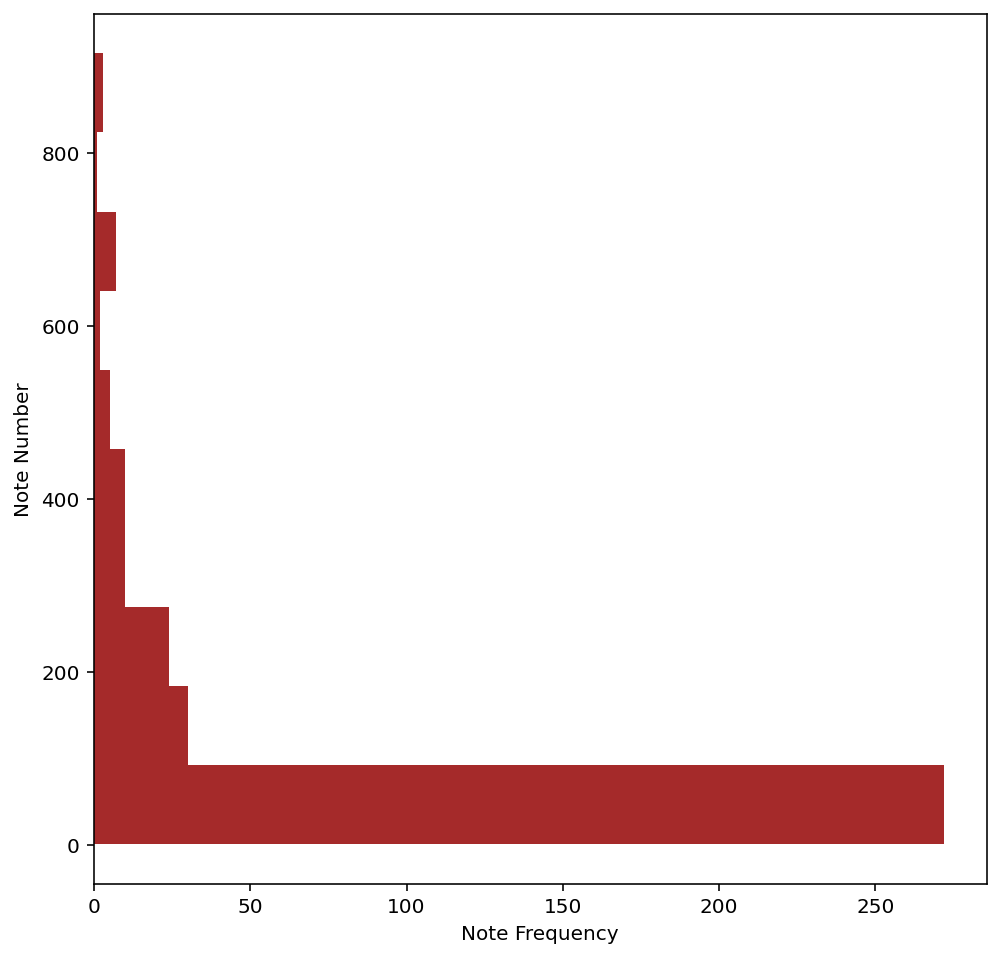

In [7]:
# Importing library
from collections import Counter

# Calculating the count of each note and storing as key-value pair in a dictionary
freq = dict(Counter(notes_))

# Importing matplotlib library
import matplotlib.pyplot as plt

# Count of frequency of each note
no=[count for _,count in freq.items()]

# Setting the plot size
plt.figure(figsize=(8,8))
plt.xlabel("Note Frequency")
plt.ylabel("Note Number")

# Visualizing the note vs frequency plot
plt.hist(no, orientation='horizontal', color = "brown")

In [8]:
# Considering only those notes which are 
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

120


In [9]:
# Creating a new music file that contains only the frequently used notes 

new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

C:\Users\Deepak\Anaconda3\envs\deepmusic_tf\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [10]:
len(new_music[2])

1098

In [11]:
# Preparing input and output sequence for the models

no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [12]:
# Assigning unique numbers to each notes
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [13]:
# Preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [14]:
#x_seq[0]

In [15]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [16]:
# Splitting the data into train and test (95% train, 5% test)

from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.15,random_state=0)

In [17]:
# Defining LSTM Model

def lstm():
    model = Sequential()
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [18]:
# Defining Wavenet Model

from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer : https://keras.io/api/layers/core_layers/embedding/
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           12000     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [19]:
# Saving the best model during trining
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [20]:
# Training the model with batch size 64 and 200 epochs
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=64,epochs=100, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/100
394/394 [==============================] - 10s 22ms/step - loss: 4.4146 - accuracy: 0.0376 - val_loss: 4.0541 - val_accuracy: 0.0672

Epoch 00001: val_loss improved from inf to 4.05410, saving model to best_model.h5
Epoch 2/100
394/394 [==============================] - 7s 17ms/step - loss: 3.9222 - accuracy: 0.0757 - val_loss: 3.8780 - val_accuracy: 0.1027

Epoch 00002: val_loss improved from 4.05410 to 3.87798, saving model to best_model.h5
Epoch 3/100
394/394 [==============================] - 8s 19ms/step - loss: 3.7267 - accuracy: 0.1002 - val_loss: 3.7369 - val_accuracy: 0.1108

Epoch 00003: val_loss improved from 3.87798 to 3.73692, saving model to best_model.h5
Epoch 4/100
394/394 [==============================] - 7s 17ms/step - loss: 3.5749 - accuracy: 0.1185 - val_loss: 3.6622 - val_accuracy: 0.1234

Epoch 00004: val_loss improved from 3.73692 to 3.66220, saving model to best_model.h5
Epoch 5/100
394/394 [==============================] - 7s 19ms/step - loss: 3.4

394/394 [==============================] - 7s 17ms/step - loss: 2.3095 - accuracy: 0.3230 - val_loss: 3.0744 - val_accuracy: 0.2099

Epoch 00038: val_loss did not improve from 3.05736
Epoch 39/100
394/394 [==============================] - 7s 19ms/step - loss: 2.2975 - accuracy: 0.3255 - val_loss: 3.0661 - val_accuracy: 0.2126

Epoch 00039: val_loss did not improve from 3.05736
Epoch 40/100
394/394 [==============================] - 7s 17ms/step - loss: 2.2834 - accuracy: 0.3314 - val_loss: 3.0770 - val_accuracy: 0.2074

Epoch 00040: val_loss did not improve from 3.05736
Epoch 41/100
394/394 [==============================] - 7s 19ms/step - loss: 2.2669 - accuracy: 0.3311 - val_loss: 3.0660 - val_accuracy: 0.2074

Epoch 00041: val_loss did not improve from 3.05736
Epoch 42/100
394/394 [==============================] - 7s 17ms/step - loss: 2.2605 - accuracy: 0.3312 - val_loss: 3.0640 - val_accuracy: 0.2151

Epoch 00042: val_loss did not improve from 3.05736
Epoch 43/100
394/394 [======

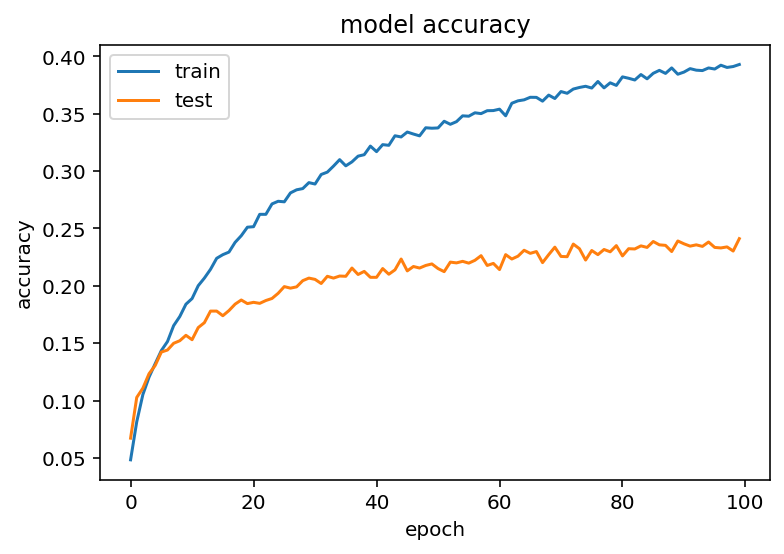

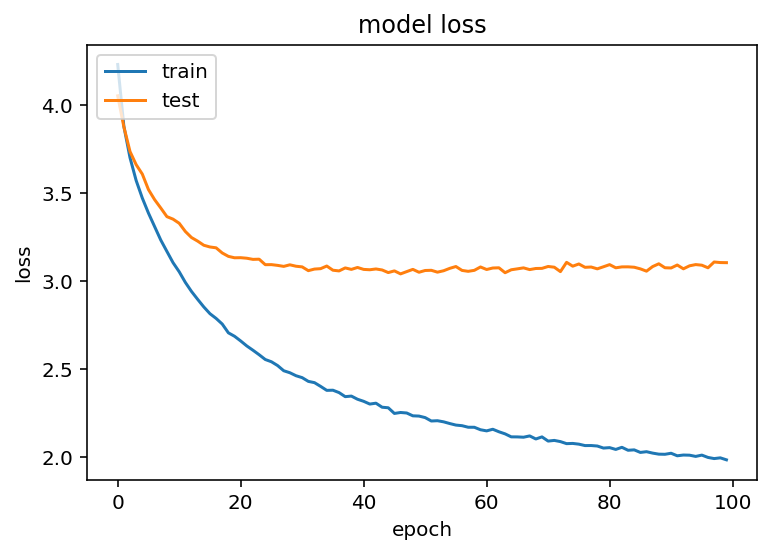

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [23]:
len(x_val)-1

4449

#### Music Generation

In [24]:
# This Bloc of code will generate only 10 seconds of song
'''
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

'''

'\nimport random\nind = np.random.randint(0,len(x_val)-1)\n\nrandom_music = x_val[ind]\n\npredictions=[]\nfor i in range(10):\n\n    random_music = random_music.reshape(1,no_of_timesteps)\n\n    prob  = model.predict(random_music)[0]\n    y_pred= np.argmax(prob,axis=0)\n    predictions.append(y_pred)\n\n    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)\n    random_music = random_music[1:]\n    \nprint(predictions)\n\n'

In [25]:
# Tuning the above code with different parameters
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]

## The following loop function will decide the number of notes to be generated
for i in range(30):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 95, 19, 75, 75, 75, 19, 75, 75, 75, 75, 75, 75, 19, 75, 75, 19, 97, 19, 97, 75]


In [26]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [27]:
# Converting the values of predicted_notes back to midi file
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='Classical.mid')

In [28]:
convert_to_midi(predicted_notes)

### Genre: Jazz

<img src="Jazz.jpg" style="width: 1000px;height: 300px"/>

In [29]:

import os

#Array Processing
import numpy as np

#specify the path
path= "C:\\Users\\Deepak\\OneDrive - National College of Ireland\\NCI\\Sem 2\\DMML 2\\Dataset\\Jazz"

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+'\\'+i) for i in files])

Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\A Walk In The Black Forest.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Alfie.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\All Blues.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Answer Me My Love.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Ask Me Now (Monk).mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Autumn In The San Juans.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Beginnings.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Better Days Ahead 

Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\So In Love (trio).mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Spain  3.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Speak Low.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Spring Is Here 2.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Star Eyes.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Stella By Starlight (solo).mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Strange Meadow Lark.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Jazz\Suite from Carmen Pre

C:\Users\Deepak\Anaconda3\envs\deepmusic_tf\lib\site-packages\ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


In [30]:
notes_array.shape

(90,)

In [31]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

825


#### The following code is the reason of having separate codes for each genre due to varying frequency of notes. The same code could have also been used for all the genres. But, separate codes were used for generating better music.

(array([753.,  30.,  11.,   7.,   8.,   4.,   5.,   3.,   2.,   2.]),
 array([1.0000e+00, 3.2170e+02, 6.4240e+02, 9.6310e+02, 1.2838e+03,
        1.6045e+03, 1.9252e+03, 2.2459e+03, 2.5666e+03, 2.8873e+03,
        3.2080e+03]),
 <BarContainer object of 10 artists>)

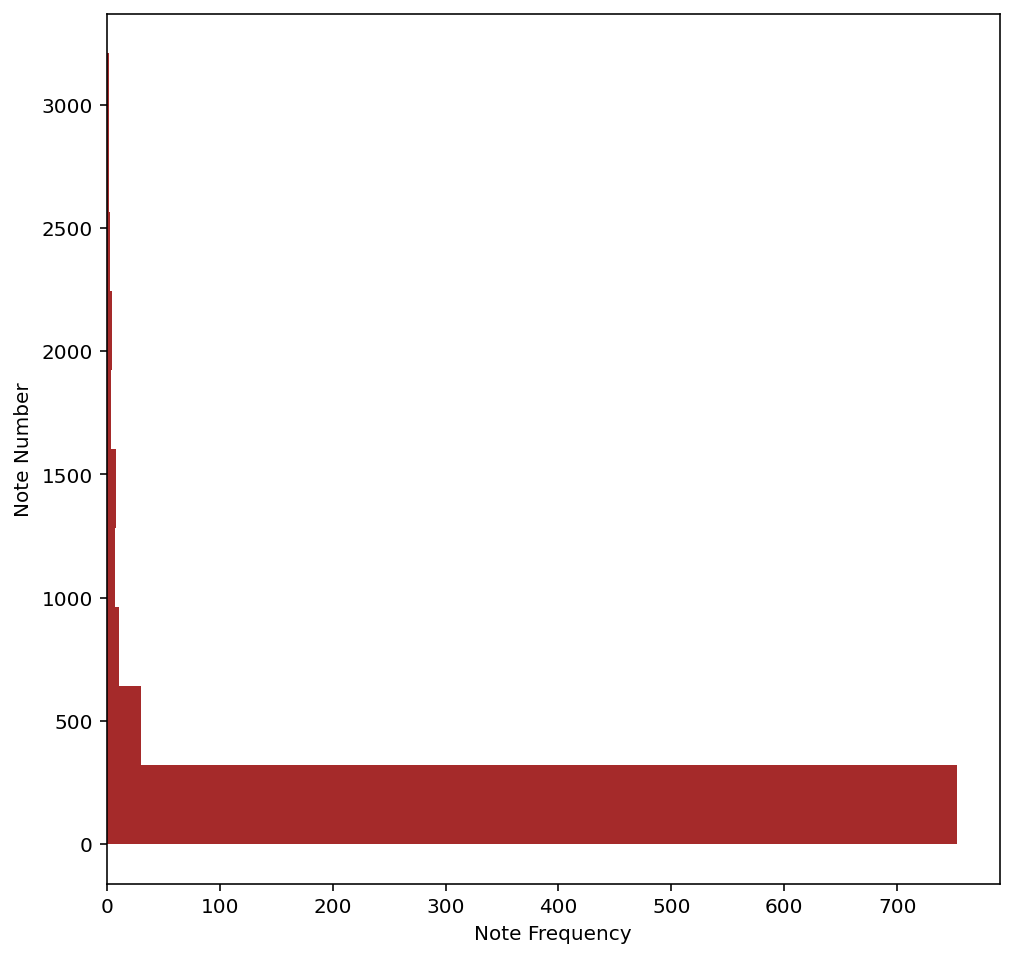

In [32]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

# Setting the plot size and provide necessary parameters
plt.figure(figsize=(8,8))
plt.xlabel("Note Frequency")
plt.ylabel("Note Number")

#plot
plt.hist(no, orientation='horizontal', color = "brown")

In [33]:
frequent_notes = [note_ for note_, count in freq.items() if count>=100]
print(len(frequent_notes))

149


In [34]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

C:\Users\Deepak\Anaconda3\envs\deepmusic_tf\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [35]:
len(new_music[2])

792

In [36]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [37]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [38]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [39]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [40]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.15,random_state=0)

In [41]:
def lstm():
    model = Sequential()
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [42]:


from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           14900     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [43]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [44]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=64,epochs=100, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/100
1203/1203 [==============================] - 26s 21ms/step - loss: 4.4668 - accuracy: 0.0398 - val_loss: 4.2251 - val_accuracy: 0.0647

Epoch 00001: val_loss improved from inf to 4.22512, saving model to best_model.h5
Epoch 2/100
1203/1203 [==============================] - 23s 19ms/step - loss: 4.1027 - accuracy: 0.0703 - val_loss: 4.1048 - val_accuracy: 0.0788

Epoch 00002: val_loss improved from 4.22512 to 4.10482, saving model to best_model.h5
Epoch 3/100
1203/1203 [==============================] - 24s 20ms/step - loss: 3.9917 - accuracy: 0.0816 - val_loss: 4.0226 - val_accuracy: 0.0830

Epoch 00003: val_loss improved from 4.10482 to 4.02263, saving model to best_model.h5
Epoch 4/100
1203/1203 [==============================] - 23s 19ms/step - loss: 3.9207 - accuracy: 0.0873 - val_loss: 4.0004 - val_accuracy: 0.0930

Epoch 00004: val_loss improved from 4.02263 to 4.00041, saving model to best_model.h5
Epoch 5/100
1203/1203 [==============================] - 24s 20ms/st

1203/1203 [==============================] - 24s 20ms/step - loss: 3.4252 - accuracy: 0.1473 - val_loss: 3.7679 - val_accuracy: 0.1149

Epoch 00038: val_loss did not improve from 3.75226
Epoch 39/100
1203/1203 [==============================] - 24s 20ms/step - loss: 3.4165 - accuracy: 0.1478 - val_loss: 3.7738 - val_accuracy: 0.1099

Epoch 00039: val_loss did not improve from 3.75226
Epoch 40/100
1203/1203 [==============================] - 23s 19ms/step - loss: 3.4075 - accuracy: 0.1472 - val_loss: 3.7663 - val_accuracy: 0.1139

Epoch 00040: val_loss did not improve from 3.75226
Epoch 41/100
1203/1203 [==============================] - 23s 19ms/step - loss: 3.4211 - accuracy: 0.1494 - val_loss: 3.7662 - val_accuracy: 0.1145

Epoch 00041: val_loss did not improve from 3.75226
Epoch 42/100
1203/1203 [==============================] - 23s 19ms/step - loss: 3.4074 - accuracy: 0.1489 - val_loss: 3.7701 - val_accuracy: 0.1137

Epoch 00042: val_loss did not improve from 3.75226
Epoch 43/100


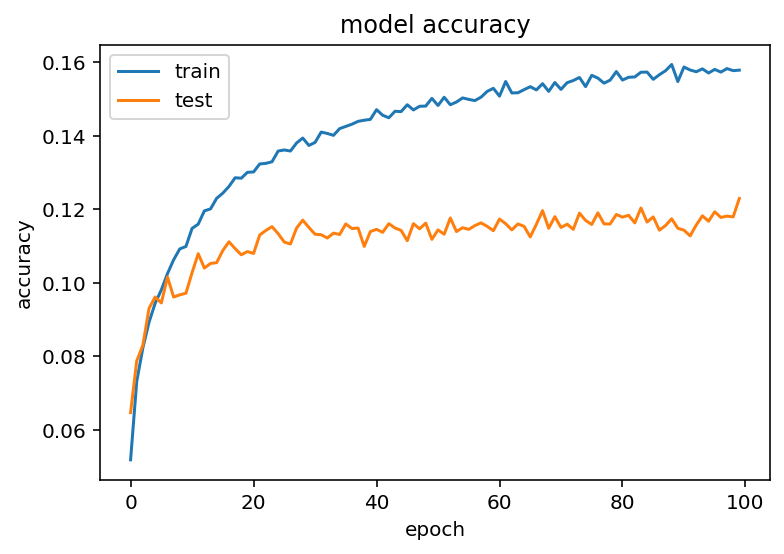

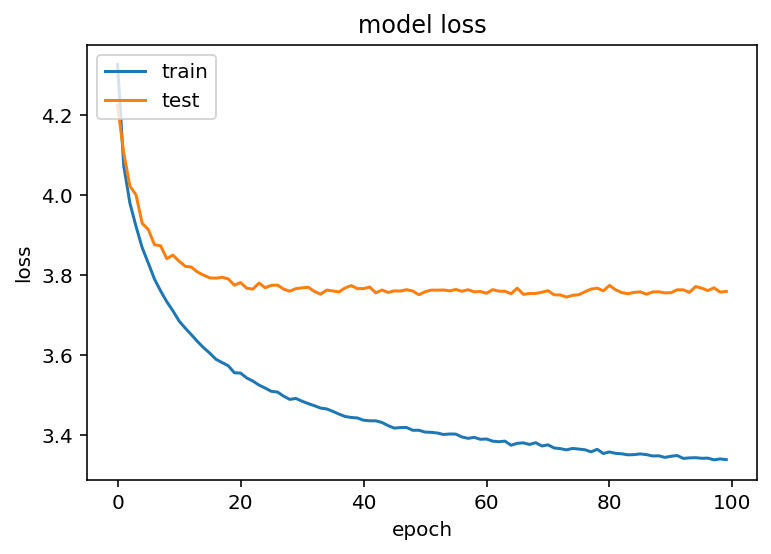

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [46]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [47]:
# Tuning the above code with different parameters
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]

# The following loop function will decide the duratin of the generated songs
for i in range(30):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[50, 50, 50, 50, 50, 50, 50, 50, 127, 50, 127, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 127, 50, 50, 50, 50, 50, 50, 50]


In [48]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [49]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='Jazz.mid')

In [50]:
convert_to_midi(predicted_notes)

### Genre: Rock

<img src="Rock.jpg" style="width: 1000px;height: 400px"/>

In [51]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path= "C:\\Users\\Deepak\\OneDrive - National College of Ireland\\NCI\\Sem 2\\DMML 2\\Dataset\\Rock"

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+'\\'+i) for i in files])

Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\52nd Street.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\A Man Ill Never Be.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\A Whiter Shade Of Pale.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\All Along the Watchtower.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Allentown.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Amazing.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Angel.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Baby Blue live (Album Version

Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Rosalindas Eyes.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Rumors Of You.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Scenes From An Italian Restaurant.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Schools Out.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Sister Golden Hair.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Smokin.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Spooky.mid
Loading Music File: C:\Users\Deepak\OneDrive - National College of Ireland\NCI\Sem 2\DMML 2\Dataset\Rock\Storm Front.mid
Loading

C:\Users\Deepak\Anaconda3\envs\deepmusic_tf\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [52]:
notes_array.shape

(90,)

In [53]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

368


(array([305.,  24.,  15.,  10.,   6.,   0.,   4.,   1.,   1.,   2.]),
 array([1.0000e+00, 2.7510e+02, 5.4920e+02, 8.2330e+02, 1.0974e+03,
        1.3715e+03, 1.6456e+03, 1.9197e+03, 2.1938e+03, 2.4679e+03,
        2.7420e+03]),
 <BarContainer object of 10 artists>)

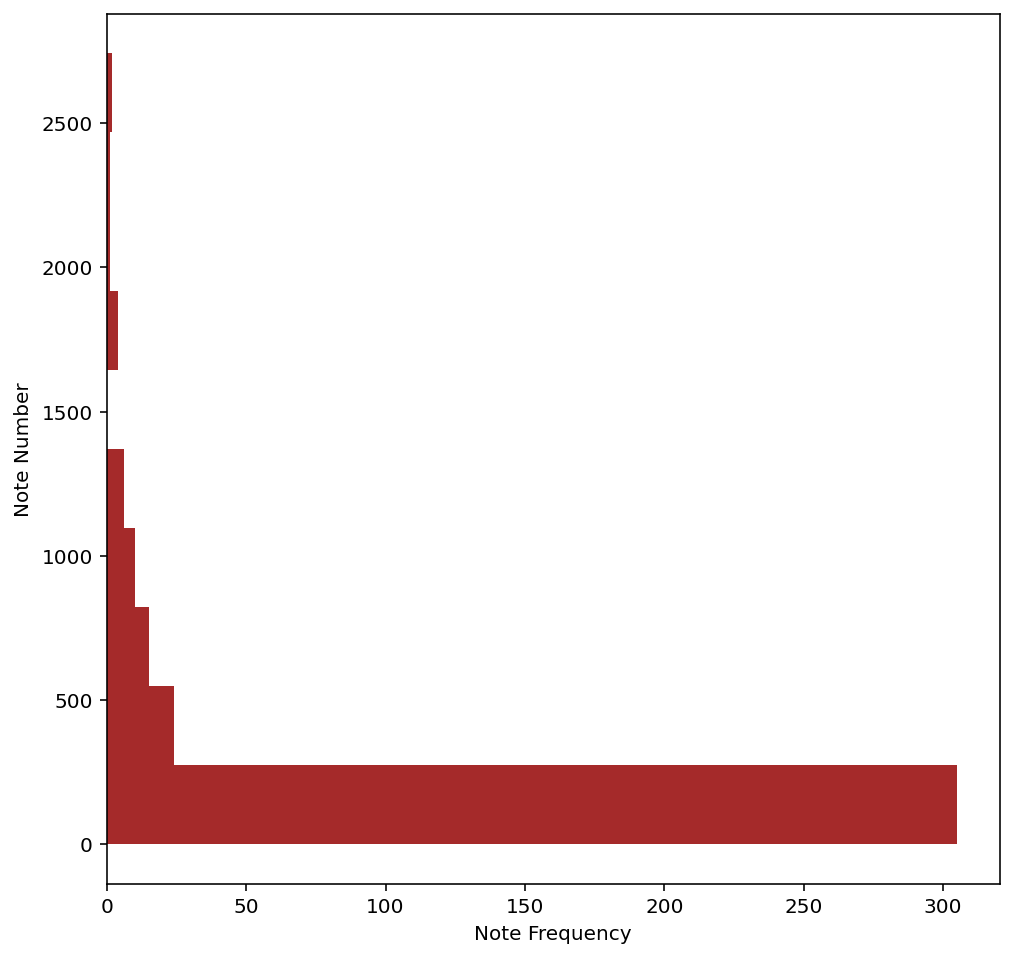

In [54]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

# Setting the plot size and providing necessary parameters
plt.figure(figsize=(8,8))
plt.xlabel("Note Frequency")
plt.ylabel("Note Number")

#plot
plt.hist(no, orientation='horizontal', color = "brown")

In [55]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

142


In [56]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

C:\Users\Deepak\Anaconda3\envs\deepmusic_tf\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [57]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [58]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [59]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [60]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [61]:
# This step was not necessary. But we have done it to perfrom intial plots  
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.15,random_state=0)

In [62]:
def lstm():
    model = Sequential()
    model.add(LSTM(128,return_sequences=True))
    model.add(LSTM(128))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [63]:


from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           14200     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [64]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [65]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=64,epochs=100, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/100
807/807 [==============================] - 19s 22ms/step - loss: 4.1368 - accuracy: 0.0786 - val_loss: 3.6148 - val_accuracy: 0.1542

Epoch 00001: val_loss improved from inf to 3.61481, saving model to best_model.h5
Epoch 2/100
807/807 [==============================] - 17s 21ms/step - loss: 3.3640 - accuracy: 0.1657 - val_loss: 3.3900 - val_accuracy: 0.1768

Epoch 00002: val_loss improved from 3.61481 to 3.39004, saving model to best_model.h5
Epoch 3/100
807/807 [==============================] - 16s 20ms/step - loss: 3.1664 - accuracy: 0.1894 - val_loss: 3.2292 - val_accuracy: 0.2002

Epoch 00003: val_loss improved from 3.39004 to 3.22917, saving model to best_model.h5
Epoch 4/100
807/807 [==============================] - 17s 21ms/step - loss: 3.0335 - accuracy: 0.2071 - val_loss: 3.1250 - val_accuracy: 0.2185

Epoch 00004: val_loss improved from 3.22917 to 3.12501, saving model to best_model.h5
Epoch 5/100
807/807 [==============================] - 17s 22ms/step - loss:


Epoch 00075: val_loss did not improve from 2.25750
Epoch 76/100
807/807 [==============================] - 17s 21ms/step - loss: 1.9252 - accuracy: 0.4124 - val_loss: 2.2605 - val_accuracy: 0.3804

Epoch 00076: val_loss did not improve from 2.25750
Epoch 77/100
807/807 [==============================] - 18s 22ms/step - loss: 1.9136 - accuracy: 0.4139 - val_loss: 2.2571 - val_accuracy: 0.3740

Epoch 00077: val_loss improved from 2.25750 to 2.25712, saving model to best_model.h5
Epoch 78/100
807/807 [==============================] - 16s 20ms/step - loss: 1.9070 - accuracy: 0.4108 - val_loss: 2.2529 - val_accuracy: 0.3773

Epoch 00078: val_loss improved from 2.25712 to 2.25291, saving model to best_model.h5
Epoch 79/100
807/807 [==============================] - 16s 20ms/step - loss: 1.9274 - accuracy: 0.4079 - val_loss: 2.2522 - val_accuracy: 0.3782

Epoch 00079: val_loss improved from 2.25291 to 2.25222, saving model to best_model.h5
Epoch 80/100
807/807 [=============================

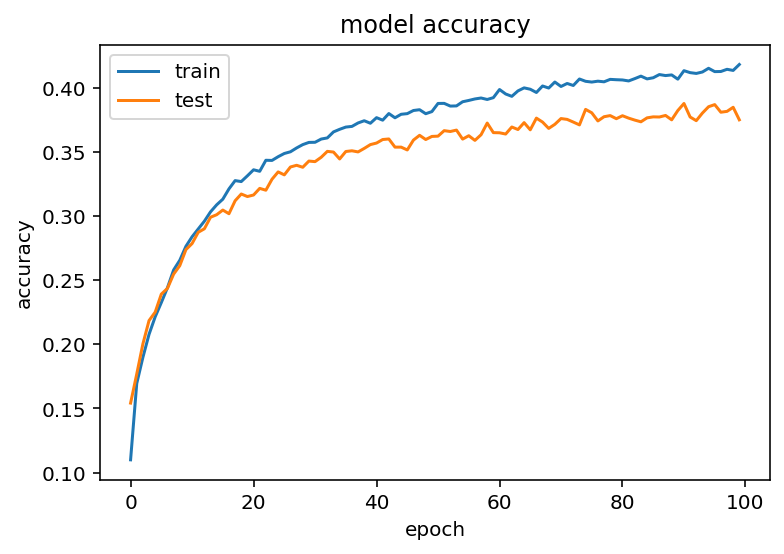

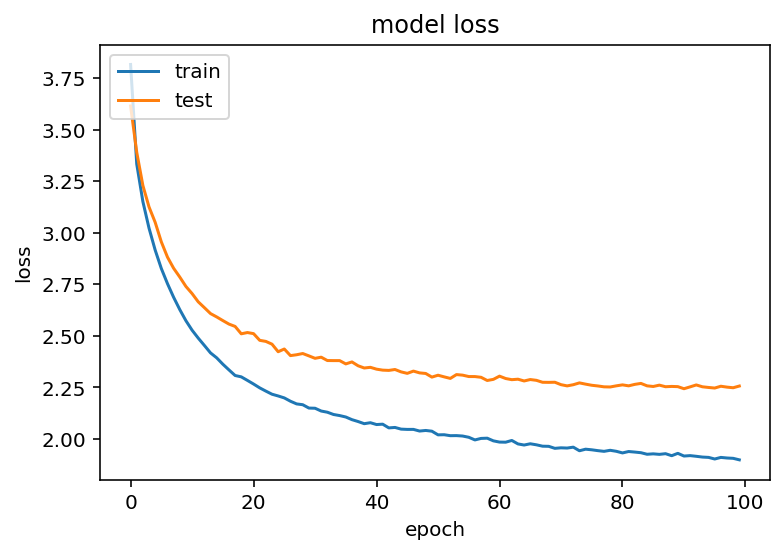

In [66]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
# Tuning the above code with different parameters
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]

# The following loop function will decide the duratin of the generated songs
for i in range(30):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[1, 1, 119, 119, 119, 6, 119, 6, 60, 1, 1, 1, 119, 119, 119, 119, 119, 6, 53, 92, 119, 119, 53, 53, 131, 119, 131, 1, 131, 1]


In [68]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [69]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='Rock.mid')

In [70]:
convert_to_midi(predicted_notes)